In [1]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
data = pd.read_csv("final_without_weather.csv")
data.drop(['Month'], axis =1, inplace= True)
data.set_index("pickuptime", inplace= True)
num_pickups = data.total
num_green_pickups = data.green
num_yellow_pickups = data.yellow
data.drop(['green', 'yellow', 'total'], axis =1, inplace = True)

In [3]:
def series_to_supervised(data, n_in, n_out, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    agg = pd.concat(cols, axis = 1)
    agg.columns = names
    
    if dropnan:
        agg.dropna(inplace = True)
        
    return agg

In [4]:
features_and_target = pd.concat([data, num_pickups], axis = 1)
values = features_and_target.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(values)

n_hours = 23

reframed = series_to_supervised(scaled, n_hours, 1)

n_features = features_and_target.shape[1]


In [5]:
# delete significantly wrong data & compare the date value
total_values = reframed.values
n_p = np.argmin(total_values[365*24*3:, -1])
n_p = n_p + 365*24*3

a = total_values[: n_p, :]
b = total_values[n_p + n_hours + 1 : , :]
total_values = np.concatenate((a, b), axis=0)

# result variable
result = np.zeros((4, 24))

Train on 1095 samples, validate on 271 samples
Epoch 1/200
 - 1s - loss: 0.5376 - val_loss: 0.4278
Epoch 2/200
 - 0s - loss: 0.5022 - val_loss: 0.3943
Epoch 3/200
 - 0s - loss: 0.4671 - val_loss: 0.3611
Epoch 4/200
 - 0s - loss: 0.4323 - val_loss: 0.3281
Epoch 5/200
 - 0s - loss: 0.3977 - val_loss: 0.2953
Epoch 6/200
 - 0s - loss: 0.3633 - val_loss: 0.2627
Epoch 7/200
 - 0s - loss: 0.3290 - val_loss: 0.2302
Epoch 8/200
 - 0s - loss: 0.2949 - val_loss: 0.1979
Epoch 9/200
 - 0s - loss: 0.2610 - val_loss: 0.1656
Epoch 10/200
 - 0s - loss: 0.2274 - val_loss: 0.1333
Epoch 11/200
 - 0s - loss: 0.1942 - val_loss: 0.1012
Epoch 12/200
 - 0s - loss: 0.1615 - val_loss: 0.0694
Epoch 13/200
 - 0s - loss: 0.1291 - val_loss: 0.0409
Epoch 14/200
 - 0s - loss: 0.0981 - val_loss: 0.0261
Epoch 15/200
 - 0s - loss: 0.0725 - val_loss: 0.0370
Epoch 16/200
 - 0s - loss: 0.0616 - val_loss: 0.0637
Epoch 17/200
 - 0s - loss: 0.0662 - val_loss: 0.0896
Epoch 18/200
 - 0s - loss: 0.0777 - val_loss: 0.1103
Epoch 19

Epoch 154/200
 - 0s - loss: 0.0491 - val_loss: 0.0180
Epoch 155/200
 - 0s - loss: 0.0490 - val_loss: 0.0179
Epoch 156/200
 - 0s - loss: 0.0490 - val_loss: 0.0179
Epoch 157/200
 - 0s - loss: 0.0490 - val_loss: 0.0179
Epoch 158/200
 - 0s - loss: 0.0489 - val_loss: 0.0179
Epoch 159/200
 - 0s - loss: 0.0489 - val_loss: 0.0179
Epoch 160/200
 - 0s - loss: 0.0489 - val_loss: 0.0178
Epoch 161/200
 - 0s - loss: 0.0488 - val_loss: 0.0178
Epoch 162/200
 - 0s - loss: 0.0488 - val_loss: 0.0178
Epoch 163/200
 - 0s - loss: 0.0487 - val_loss: 0.0178
Epoch 164/200
 - 0s - loss: 0.0487 - val_loss: 0.0178
Epoch 165/200
 - 0s - loss: 0.0487 - val_loss: 0.0178
Epoch 166/200
 - 0s - loss: 0.0486 - val_loss: 0.0178
Epoch 167/200
 - 0s - loss: 0.0486 - val_loss: 0.0178
Epoch 168/200
 - 0s - loss: 0.0485 - val_loss: 0.0178
Epoch 169/200
 - 0s - loss: 0.0485 - val_loss: 0.0178
Epoch 170/200
 - 0s - loss: 0.0485 - val_loss: 0.0178
Epoch 171/200
 - 0s - loss: 0.0484 - val_loss: 0.0178
Epoch 172/200
 - 0s - loss: 

Epoch 107/200
 - 0s - loss: 0.0631 - val_loss: 0.0450
Epoch 108/200
 - 0s - loss: 0.0630 - val_loss: 0.0452
Epoch 109/200
 - 0s - loss: 0.0629 - val_loss: 0.0454
Epoch 110/200
 - 0s - loss: 0.0629 - val_loss: 0.0455
Epoch 111/200
 - 0s - loss: 0.0628 - val_loss: 0.0455
Epoch 112/200
 - 0s - loss: 0.0627 - val_loss: 0.0455
Epoch 113/200
 - 0s - loss: 0.0627 - val_loss: 0.0453
Epoch 114/200
 - 0s - loss: 0.0626 - val_loss: 0.0451
Epoch 115/200
 - 0s - loss: 0.0626 - val_loss: 0.0449
Epoch 116/200
 - 0s - loss: 0.0625 - val_loss: 0.0446
Epoch 117/200
 - 0s - loss: 0.0625 - val_loss: 0.0444
Epoch 118/200
 - 0s - loss: 0.0624 - val_loss: 0.0442
Epoch 119/200
 - 0s - loss: 0.0623 - val_loss: 0.0440
Epoch 120/200
 - 0s - loss: 0.0623 - val_loss: 0.0438
Epoch 121/200
 - 0s - loss: 0.0622 - val_loss: 0.0437
Epoch 122/200
 - 0s - loss: 0.0622 - val_loss: 0.0436
Epoch 123/200
 - 0s - loss: 0.0621 - val_loss: 0.0435
Epoch 124/200
 - 0s - loss: 0.0621 - val_loss: 0.0435
Epoch 125/200
 - 0s - loss: 

Epoch 60/200
 - 0s - loss: 0.0911 - val_loss: 0.0319
Epoch 61/200
 - 0s - loss: 0.0910 - val_loss: 0.0326
Epoch 62/200
 - 0s - loss: 0.0908 - val_loss: 0.0334
Epoch 63/200
 - 0s - loss: 0.0906 - val_loss: 0.0344
Epoch 64/200
 - 0s - loss: 0.0905 - val_loss: 0.0353
Epoch 65/200
 - 0s - loss: 0.0904 - val_loss: 0.0360
Epoch 66/200
 - 0s - loss: 0.0902 - val_loss: 0.0363
Epoch 67/200
 - 0s - loss: 0.0901 - val_loss: 0.0363
Epoch 68/200
 - 0s - loss: 0.0900 - val_loss: 0.0360
Epoch 69/200
 - 0s - loss: 0.0899 - val_loss: 0.0355
Epoch 70/200
 - 0s - loss: 0.0897 - val_loss: 0.0349
Epoch 71/200
 - 0s - loss: 0.0896 - val_loss: 0.0343
Epoch 72/200
 - 0s - loss: 0.0895 - val_loss: 0.0338
Epoch 73/200
 - 0s - loss: 0.0894 - val_loss: 0.0335
Epoch 74/200
 - 0s - loss: 0.0893 - val_loss: 0.0335
Epoch 75/200
 - 0s - loss: 0.0891 - val_loss: 0.0336
Epoch 76/200
 - 0s - loss: 0.0890 - val_loss: 0.0338
Epoch 77/200
 - 0s - loss: 0.0889 - val_loss: 0.0341
Epoch 78/200
 - 0s - loss: 0.0888 - val_loss: 

Epoch 12/200
 - 0s - loss: 0.1566 - val_loss: 0.0568
Epoch 13/200
 - 0s - loss: 0.1455 - val_loss: 0.0440
Epoch 14/200
 - 0s - loss: 0.1360 - val_loss: 0.0433
Epoch 15/200
 - 0s - loss: 0.1300 - val_loss: 0.0512
Epoch 16/200
 - 0s - loss: 0.1275 - val_loss: 0.0621
Epoch 17/200
 - 0s - loss: 0.1275 - val_loss: 0.0759
Epoch 18/200
 - 0s - loss: 0.1293 - val_loss: 0.0895
Epoch 19/200
 - 0s - loss: 0.1323 - val_loss: 0.1008
Epoch 20/200
 - 0s - loss: 0.1352 - val_loss: 0.1084
Epoch 21/200
 - 0s - loss: 0.1373 - val_loss: 0.1121
Epoch 22/200
 - 0s - loss: 0.1384 - val_loss: 0.1121
Epoch 23/200
 - 0s - loss: 0.1382 - val_loss: 0.1091
Epoch 24/200
 - 0s - loss: 0.1368 - val_loss: 0.1036
Epoch 25/200
 - 0s - loss: 0.1347 - val_loss: 0.0964
Epoch 26/200
 - 0s - loss: 0.1322 - val_loss: 0.0883
Epoch 27/200
 - 0s - loss: 0.1295 - val_loss: 0.0797
Epoch 28/200
 - 0s - loss: 0.1269 - val_loss: 0.0715
Epoch 29/200
 - 0s - loss: 0.1248 - val_loss: 0.0641
Epoch 30/200
 - 0s - loss: 0.1231 - val_loss: 

Epoch 166/200
 - 0s - loss: 0.0991 - val_loss: 0.0519
Epoch 167/200
 - 0s - loss: 0.0987 - val_loss: 0.0524
Epoch 168/200
 - 0s - loss: 0.0983 - val_loss: 0.0530
Epoch 169/200
 - 0s - loss: 0.0978 - val_loss: 0.0536
Epoch 170/200
 - 0s - loss: 0.0974 - val_loss: 0.0544
Epoch 171/200
 - 0s - loss: 0.0969 - val_loss: 0.0551
Epoch 172/200
 - 0s - loss: 0.0964 - val_loss: 0.0556
Epoch 173/200
 - 0s - loss: 0.0959 - val_loss: 0.0559
Epoch 174/200
 - 0s - loss: 0.0954 - val_loss: 0.0560
Epoch 175/200
 - 0s - loss: 0.0948 - val_loss: 0.0562
Epoch 176/200
 - 0s - loss: 0.0943 - val_loss: 0.0563
Epoch 177/200
 - 0s - loss: 0.0937 - val_loss: 0.0566
Epoch 178/200
 - 0s - loss: 0.0931 - val_loss: 0.0569
Epoch 179/200
 - 0s - loss: 0.0925 - val_loss: 0.0573
Epoch 180/200
 - 0s - loss: 0.0918 - val_loss: 0.0576
Epoch 181/200
 - 0s - loss: 0.0911 - val_loss: 0.0582
Epoch 182/200
 - 0s - loss: 0.0904 - val_loss: 0.0591
Epoch 183/200
 - 0s - loss: 0.0897 - val_loss: 0.0604
Epoch 184/200
 - 0s - loss: 

Epoch 119/200
 - 0s - loss: 0.1100 - val_loss: 0.0484
Epoch 120/200
 - 0s - loss: 0.1095 - val_loss: 0.0484
Epoch 121/200
 - 0s - loss: 0.1091 - val_loss: 0.0484
Epoch 122/200
 - 0s - loss: 0.1086 - val_loss: 0.0485
Epoch 123/200
 - 0s - loss: 0.1080 - val_loss: 0.0485
Epoch 124/200
 - 0s - loss: 0.1075 - val_loss: 0.0485
Epoch 125/200
 - 0s - loss: 0.1070 - val_loss: 0.0486
Epoch 126/200
 - 0s - loss: 0.1064 - val_loss: 0.0486
Epoch 127/200
 - 0s - loss: 0.1058 - val_loss: 0.0486
Epoch 128/200
 - 0s - loss: 0.1052 - val_loss: 0.0486
Epoch 129/200
 - 0s - loss: 0.1046 - val_loss: 0.0487
Epoch 130/200
 - 0s - loss: 0.1040 - val_loss: 0.0488
Epoch 131/200
 - 0s - loss: 0.1033 - val_loss: 0.0489
Epoch 132/200
 - 0s - loss: 0.1026 - val_loss: 0.0491
Epoch 133/200
 - 0s - loss: 0.1019 - val_loss: 0.0492
Epoch 134/200
 - 0s - loss: 0.1012 - val_loss: 0.0494
Epoch 135/200
 - 0s - loss: 0.1004 - val_loss: 0.0496
Epoch 136/200
 - 0s - loss: 0.0996 - val_loss: 0.0498
Epoch 137/200
 - 0s - loss: 

Epoch 72/200
 - 0s - loss: 0.1210 - val_loss: 0.0412
Epoch 73/200
 - 0s - loss: 0.1203 - val_loss: 0.0413
Epoch 74/200
 - 0s - loss: 0.1194 - val_loss: 0.0414
Epoch 75/200
 - 0s - loss: 0.1185 - val_loss: 0.0414
Epoch 76/200
 - 0s - loss: 0.1176 - val_loss: 0.0414
Epoch 77/200
 - 0s - loss: 0.1166 - val_loss: 0.0414
Epoch 78/200
 - 0s - loss: 0.1156 - val_loss: 0.0415
Epoch 79/200
 - 0s - loss: 0.1145 - val_loss: 0.0418
Epoch 80/200
 - 0s - loss: 0.1133 - val_loss: 0.0421
Epoch 81/200
 - 0s - loss: 0.1121 - val_loss: 0.0427
Epoch 82/200
 - 0s - loss: 0.1107 - val_loss: 0.0435
Epoch 83/200
 - 0s - loss: 0.1093 - val_loss: 0.0445
Epoch 84/200
 - 0s - loss: 0.1078 - val_loss: 0.0454
Epoch 85/200
 - 0s - loss: 0.1062 - val_loss: 0.0462
Epoch 86/200
 - 0s - loss: 0.1044 - val_loss: 0.0468
Epoch 87/200
 - 0s - loss: 0.1025 - val_loss: 0.0476
Epoch 88/200
 - 0s - loss: 0.1004 - val_loss: 0.0486
Epoch 89/200
 - 0s - loss: 0.0982 - val_loss: 0.0502
Epoch 90/200
 - 0s - loss: 0.0959 - val_loss: 

Epoch 24/200
 - 0s - loss: 0.1650 - val_loss: 0.0819
Epoch 25/200
 - 0s - loss: 0.1629 - val_loss: 0.0786
Epoch 26/200
 - 0s - loss: 0.1608 - val_loss: 0.0758
Epoch 27/200
 - 0s - loss: 0.1592 - val_loss: 0.0734
Epoch 28/200
 - 0s - loss: 0.1578 - val_loss: 0.0717
Epoch 29/200
 - 0s - loss: 0.1567 - val_loss: 0.0705
Epoch 30/200
 - 0s - loss: 0.1558 - val_loss: 0.0695
Epoch 31/200
 - 0s - loss: 0.1550 - val_loss: 0.0686
Epoch 32/200
 - 0s - loss: 0.1543 - val_loss: 0.0678
Epoch 33/200
 - 0s - loss: 0.1536 - val_loss: 0.0669
Epoch 34/200
 - 0s - loss: 0.1528 - val_loss: 0.0659
Epoch 35/200
 - 0s - loss: 0.1520 - val_loss: 0.0649
Epoch 36/200
 - 0s - loss: 0.1511 - val_loss: 0.0637
Epoch 37/200
 - 0s - loss: 0.1501 - val_loss: 0.0625
Epoch 38/200
 - 0s - loss: 0.1490 - val_loss: 0.0612
Epoch 39/200
 - 0s - loss: 0.1479 - val_loss: 0.0600
Epoch 40/200
 - 0s - loss: 0.1467 - val_loss: 0.0588
Epoch 41/200
 - 0s - loss: 0.1455 - val_loss: 0.0579
Epoch 42/200
 - 0s - loss: 0.1443 - val_loss: 

 - 0s - loss: 0.0412 - val_loss: 0.0318
Epoch 178/200
 - 0s - loss: 0.0411 - val_loss: 0.0316
Epoch 179/200
 - 0s - loss: 0.0409 - val_loss: 0.0317
Epoch 180/200
 - 0s - loss: 0.0408 - val_loss: 0.0316
Epoch 181/200
 - 0s - loss: 0.0407 - val_loss: 0.0315
Epoch 182/200
 - 0s - loss: 0.0405 - val_loss: 0.0313
Epoch 183/200
 - 0s - loss: 0.0404 - val_loss: 0.0315
Epoch 184/200
 - 0s - loss: 0.0402 - val_loss: 0.0312
Epoch 185/200
 - 0s - loss: 0.0401 - val_loss: 0.0314
Epoch 186/200
 - 0s - loss: 0.0400 - val_loss: 0.0310
Epoch 187/200
 - 0s - loss: 0.0399 - val_loss: 0.0318
Epoch 188/200
 - 0s - loss: 0.0397 - val_loss: 0.0311
Epoch 189/200
 - 0s - loss: 0.0395 - val_loss: 0.0317
Epoch 190/200
 - 0s - loss: 0.0394 - val_loss: 0.0312
Epoch 191/200
 - 0s - loss: 0.0392 - val_loss: 0.0318
Epoch 192/200
 - 0s - loss: 0.0391 - val_loss: 0.0308
Epoch 193/200
 - 0s - loss: 0.0390 - val_loss: 0.0324
Epoch 194/200
 - 0s - loss: 0.0390 - val_loss: 0.0305
Epoch 195/200
 - 0s - loss: 0.0389 - val_l

 - 0s - loss: 0.0801 - val_loss: 0.0314
Epoch 131/200
 - 0s - loss: 0.0796 - val_loss: 0.0316
Epoch 132/200
 - 0s - loss: 0.0792 - val_loss: 0.0320
Epoch 133/200
 - 0s - loss: 0.0787 - val_loss: 0.0325
Epoch 134/200
 - 0s - loss: 0.0783 - val_loss: 0.0330
Epoch 135/200
 - 0s - loss: 0.0778 - val_loss: 0.0338
Epoch 136/200
 - 0s - loss: 0.0773 - val_loss: 0.0345
Epoch 137/200
 - 0s - loss: 0.0769 - val_loss: 0.0353
Epoch 138/200
 - 0s - loss: 0.0764 - val_loss: 0.0358
Epoch 139/200
 - 0s - loss: 0.0759 - val_loss: 0.0361
Epoch 140/200
 - 0s - loss: 0.0754 - val_loss: 0.0363
Epoch 141/200
 - 0s - loss: 0.0749 - val_loss: 0.0364
Epoch 142/200
 - 0s - loss: 0.0745 - val_loss: 0.0371
Epoch 143/200
 - 0s - loss: 0.0740 - val_loss: 0.0384
Epoch 144/200
 - 0s - loss: 0.0735 - val_loss: 0.0402
Epoch 145/200
 - 0s - loss: 0.0730 - val_loss: 0.0424
Epoch 146/200
 - 0s - loss: 0.0725 - val_loss: 0.0445
Epoch 147/200
 - 0s - loss: 0.0721 - val_loss: 0.0459
Epoch 148/200
 - 0s - loss: 0.0716 - val_l

Epoch 83/200
 - 0s - loss: 0.0964 - val_loss: 0.0327
Epoch 84/200
 - 0s - loss: 0.0962 - val_loss: 0.0327
Epoch 85/200
 - 0s - loss: 0.0961 - val_loss: 0.0327
Epoch 86/200
 - 0s - loss: 0.0959 - val_loss: 0.0327
Epoch 87/200
 - 0s - loss: 0.0958 - val_loss: 0.0326
Epoch 88/200
 - 0s - loss: 0.0956 - val_loss: 0.0326
Epoch 89/200
 - 0s - loss: 0.0955 - val_loss: 0.0325
Epoch 90/200
 - 0s - loss: 0.0953 - val_loss: 0.0325
Epoch 91/200
 - 0s - loss: 0.0952 - val_loss: 0.0325
Epoch 92/200
 - 0s - loss: 0.0950 - val_loss: 0.0324
Epoch 93/200
 - 0s - loss: 0.0949 - val_loss: 0.0324
Epoch 94/200
 - 0s - loss: 0.0947 - val_loss: 0.0324
Epoch 95/200
 - 0s - loss: 0.0946 - val_loss: 0.0324
Epoch 96/200
 - 0s - loss: 0.0944 - val_loss: 0.0323
Epoch 97/200
 - 0s - loss: 0.0943 - val_loss: 0.0323
Epoch 98/200
 - 0s - loss: 0.0941 - val_loss: 0.0323
Epoch 99/200
 - 0s - loss: 0.0939 - val_loss: 0.0323
Epoch 100/200
 - 0s - loss: 0.0938 - val_loss: 0.0323
Epoch 101/200
 - 0s - loss: 0.0936 - val_loss

Epoch 35/200
 - 0s - loss: 0.1299 - val_loss: 0.0599
Epoch 36/200
 - 0s - loss: 0.1283 - val_loss: 0.0570
Epoch 37/200
 - 0s - loss: 0.1271 - val_loss: 0.0550
Epoch 38/200
 - 0s - loss: 0.1263 - val_loss: 0.0538
Epoch 39/200
 - 0s - loss: 0.1259 - val_loss: 0.0530
Epoch 40/200
 - 0s - loss: 0.1257 - val_loss: 0.0525
Epoch 41/200
 - 0s - loss: 0.1255 - val_loss: 0.0524
Epoch 42/200
 - 0s - loss: 0.1255 - val_loss: 0.0525
Epoch 43/200
 - 0s - loss: 0.1255 - val_loss: 0.0526
Epoch 44/200
 - 0s - loss: 0.1255 - val_loss: 0.0527
Epoch 45/200
 - 0s - loss: 0.1255 - val_loss: 0.0527
Epoch 46/200
 - 0s - loss: 0.1253 - val_loss: 0.0525
Epoch 47/200
 - 0s - loss: 0.1251 - val_loss: 0.0523
Epoch 48/200
 - 0s - loss: 0.1249 - val_loss: 0.0519
Epoch 49/200
 - 0s - loss: 0.1246 - val_loss: 0.0515
Epoch 50/200
 - 0s - loss: 0.1243 - val_loss: 0.0510
Epoch 51/200
 - 0s - loss: 0.1239 - val_loss: 0.0504
Epoch 52/200
 - 0s - loss: 0.1236 - val_loss: 0.0499
Epoch 53/200
 - 0s - loss: 0.1232 - val_loss: 

Epoch 188/200
 - 0s - loss: 0.0593 - val_loss: 0.0609
Epoch 189/200
 - 0s - loss: 0.0588 - val_loss: 0.0588
Epoch 190/200
 - 0s - loss: 0.0584 - val_loss: 0.0576
Epoch 191/200
 - 0s - loss: 0.0579 - val_loss: 0.0586
Epoch 192/200
 - 0s - loss: 0.0574 - val_loss: 0.0565
Epoch 193/200
 - 0s - loss: 0.0570 - val_loss: 0.0557
Epoch 194/200
 - 0s - loss: 0.0565 - val_loss: 0.0555
Epoch 195/200
 - 0s - loss: 0.0561 - val_loss: 0.0546
Epoch 196/200
 - 0s - loss: 0.0556 - val_loss: 0.0534
Epoch 197/200
 - 0s - loss: 0.0552 - val_loss: 0.0529
Epoch 198/200
 - 0s - loss: 0.0547 - val_loss: 0.0519
Epoch 199/200
 - 0s - loss: 0.0543 - val_loss: 0.0504
Epoch 200/200
 - 0s - loss: 0.0538 - val_loss: 0.0505
Train on 1095 samples, validate on 272 samples
Epoch 1/200
 - 5s - loss: 0.2514 - val_loss: 0.1930
Epoch 2/200
 - 0s - loss: 0.2237 - val_loss: 0.1644
Epoch 3/200
 - 0s - loss: 0.1975 - val_loss: 0.1360
Epoch 4/200
 - 0s - loss: 0.1758 - val_loss: 0.1097
Epoch 5/200
 - 0s - loss: 0.1576 - val_loss

Epoch 141/200
 - 0s - loss: 0.0490 - val_loss: 0.0413
Epoch 142/200
 - 0s - loss: 0.0488 - val_loss: 0.0410
Epoch 143/200
 - 0s - loss: 0.0486 - val_loss: 0.0409
Epoch 144/200
 - 0s - loss: 0.0484 - val_loss: 0.0411
Epoch 145/200
 - 0s - loss: 0.0483 - val_loss: 0.0410
Epoch 146/200
 - 0s - loss: 0.0481 - val_loss: 0.0406
Epoch 147/200
 - 0s - loss: 0.0479 - val_loss: 0.0403
Epoch 148/200
 - 0s - loss: 0.0478 - val_loss: 0.0405
Epoch 149/200
 - 0s - loss: 0.0476 - val_loss: 0.0402
Epoch 150/200
 - 0s - loss: 0.0474 - val_loss: 0.0395
Epoch 151/200
 - 0s - loss: 0.0473 - val_loss: 0.0392
Epoch 152/200
 - 0s - loss: 0.0471 - val_loss: 0.0393
Epoch 153/200
 - 0s - loss: 0.0470 - val_loss: 0.0395
Epoch 154/200
 - 0s - loss: 0.0468 - val_loss: 0.0391
Epoch 155/200
 - 0s - loss: 0.0467 - val_loss: 0.0386
Epoch 156/200
 - 0s - loss: 0.0465 - val_loss: 0.0384
Epoch 157/200
 - 0s - loss: 0.0463 - val_loss: 0.0384
Epoch 158/200
 - 0s - loss: 0.0462 - val_loss: 0.0385
Epoch 159/200
 - 0s - loss: 

Epoch 94/200
 - 0s - loss: 0.1064 - val_loss: 0.0528
Epoch 95/200
 - 0s - loss: 0.1061 - val_loss: 0.0528
Epoch 96/200
 - 0s - loss: 0.1058 - val_loss: 0.0528
Epoch 97/200
 - 0s - loss: 0.1056 - val_loss: 0.0529
Epoch 98/200
 - 0s - loss: 0.1053 - val_loss: 0.0530
Epoch 99/200
 - 0s - loss: 0.1050 - val_loss: 0.0531
Epoch 100/200
 - 0s - loss: 0.1047 - val_loss: 0.0533
Epoch 101/200
 - 0s - loss: 0.1044 - val_loss: 0.0535
Epoch 102/200
 - 0s - loss: 0.1041 - val_loss: 0.0537
Epoch 103/200
 - 0s - loss: 0.1038 - val_loss: 0.0539
Epoch 104/200
 - 0s - loss: 0.1035 - val_loss: 0.0540
Epoch 105/200
 - 0s - loss: 0.1032 - val_loss: 0.0542
Epoch 106/200
 - 0s - loss: 0.1029 - val_loss: 0.0543
Epoch 107/200
 - 0s - loss: 0.1026 - val_loss: 0.0544
Epoch 108/200
 - 0s - loss: 0.1023 - val_loss: 0.0544
Epoch 109/200
 - 0s - loss: 0.1019 - val_loss: 0.0544
Epoch 110/200
 - 0s - loss: 0.1016 - val_loss: 0.0544
Epoch 111/200
 - 0s - loss: 0.1012 - val_loss: 0.0543
Epoch 112/200
 - 0s - loss: 0.1009

Epoch 46/200
 - 0s - loss: 0.1164 - val_loss: 0.0504
Epoch 47/200
 - 0s - loss: 0.1160 - val_loss: 0.0511
Epoch 48/200
 - 0s - loss: 0.1156 - val_loss: 0.0518
Epoch 49/200
 - 0s - loss: 0.1152 - val_loss: 0.0525
Epoch 50/200
 - 0s - loss: 0.1148 - val_loss: 0.0533
Epoch 51/200
 - 0s - loss: 0.1145 - val_loss: 0.0541
Epoch 52/200
 - 0s - loss: 0.1142 - val_loss: 0.0547
Epoch 53/200
 - 0s - loss: 0.1140 - val_loss: 0.0553
Epoch 54/200
 - 0s - loss: 0.1137 - val_loss: 0.0557
Epoch 55/200
 - 0s - loss: 0.1134 - val_loss: 0.0560
Epoch 56/200
 - 0s - loss: 0.1131 - val_loss: 0.0561
Epoch 57/200
 - 0s - loss: 0.1128 - val_loss: 0.0560
Epoch 58/200
 - 0s - loss: 0.1125 - val_loss: 0.0558
Epoch 59/200
 - 0s - loss: 0.1121 - val_loss: 0.0555
Epoch 60/200
 - 0s - loss: 0.1118 - val_loss: 0.0550
Epoch 61/200
 - 0s - loss: 0.1114 - val_loss: 0.0545
Epoch 62/200
 - 0s - loss: 0.1110 - val_loss: 0.0540
Epoch 63/200
 - 0s - loss: 0.1106 - val_loss: 0.0535
Epoch 64/200
 - 0s - loss: 0.1103 - val_loss: 

Epoch 199/200
 - 0s - loss: 0.0270 - val_loss: 0.0282
Epoch 200/200
 - 0s - loss: 0.0264 - val_loss: 0.0283
Train on 1095 samples, validate on 271 samples
Epoch 1/200
 - 6s - loss: 0.1526 - val_loss: 0.0741
Epoch 2/200
 - 0s - loss: 0.1502 - val_loss: 0.0743
Epoch 3/200
 - 0s - loss: 0.1483 - val_loss: 0.0745
Epoch 4/200
 - 0s - loss: 0.1466 - val_loss: 0.0747
Epoch 5/200
 - 0s - loss: 0.1450 - val_loss: 0.0744
Epoch 6/200
 - 0s - loss: 0.1435 - val_loss: 0.0739
Epoch 7/200
 - 0s - loss: 0.1420 - val_loss: 0.0727
Epoch 8/200
 - 0s - loss: 0.1404 - val_loss: 0.0708
Epoch 9/200
 - 0s - loss: 0.1390 - val_loss: 0.0684
Epoch 10/200
 - 0s - loss: 0.1376 - val_loss: 0.0659
Epoch 11/200
 - 0s - loss: 0.1365 - val_loss: 0.0635
Epoch 12/200
 - 0s - loss: 0.1354 - val_loss: 0.0616
Epoch 13/200
 - 0s - loss: 0.1345 - val_loss: 0.0607
Epoch 14/200
 - 0s - loss: 0.1338 - val_loss: 0.0616
Epoch 15/200
 - 0s - loss: 0.1332 - val_loss: 0.0636
Epoch 16/200
 - 0s - loss: 0.1326 - val_loss: 0.0658
Epoch 

Epoch 152/200
 - 0s - loss: 0.0279 - val_loss: 0.0288
Epoch 153/200
 - 0s - loss: 0.0277 - val_loss: 0.0288
Epoch 154/200
 - 0s - loss: 0.0276 - val_loss: 0.0287
Epoch 155/200
 - 0s - loss: 0.0275 - val_loss: 0.0281
Epoch 156/200
 - 0s - loss: 0.0274 - val_loss: 0.0287
Epoch 157/200
 - 0s - loss: 0.0273 - val_loss: 0.0274
Epoch 158/200
 - 0s - loss: 0.0271 - val_loss: 0.0282
Epoch 159/200
 - 0s - loss: 0.0270 - val_loss: 0.0276
Epoch 160/200
 - 0s - loss: 0.0268 - val_loss: 0.0273
Epoch 161/200
 - 0s - loss: 0.0267 - val_loss: 0.0278
Epoch 162/200
 - 0s - loss: 0.0266 - val_loss: 0.0268
Epoch 163/200
 - 0s - loss: 0.0265 - val_loss: 0.0279
Epoch 164/200
 - 0s - loss: 0.0264 - val_loss: 0.0263
Epoch 165/200
 - 0s - loss: 0.0263 - val_loss: 0.0278
Epoch 166/200
 - 0s - loss: 0.0261 - val_loss: 0.0261
Epoch 167/200
 - 0s - loss: 0.0260 - val_loss: 0.0279
Epoch 168/200
 - 0s - loss: 0.0260 - val_loss: 0.0250
Epoch 169/200
 - 0s - loss: 0.0262 - val_loss: 0.0298
Epoch 170/200
 - 0s - loss: 

Epoch 105/200
 - 0s - loss: 0.1144 - val_loss: 0.1344
Epoch 106/200
 - 0s - loss: 0.1138 - val_loss: 0.1342
Epoch 107/200
 - 0s - loss: 0.1132 - val_loss: 0.1339
Epoch 108/200
 - 0s - loss: 0.1125 - val_loss: 0.1337
Epoch 109/200
 - 0s - loss: 0.1119 - val_loss: 0.1335
Epoch 110/200
 - 0s - loss: 0.1112 - val_loss: 0.1334
Epoch 111/200
 - 0s - loss: 0.1106 - val_loss: 0.1334
Epoch 112/200
 - 0s - loss: 0.1099 - val_loss: 0.1335
Epoch 113/200
 - 0s - loss: 0.1092 - val_loss: 0.1336
Epoch 114/200
 - 0s - loss: 0.1085 - val_loss: 0.1339
Epoch 115/200
 - 0s - loss: 0.1078 - val_loss: 0.1342
Epoch 116/200
 - 0s - loss: 0.1070 - val_loss: 0.1347
Epoch 117/200
 - 0s - loss: 0.1063 - val_loss: 0.1352
Epoch 118/200
 - 0s - loss: 0.1055 - val_loss: 0.1359
Epoch 119/200
 - 0s - loss: 0.1047 - val_loss: 0.1367
Epoch 120/200
 - 0s - loss: 0.1038 - val_loss: 0.1374
Epoch 121/200
 - 0s - loss: 0.1030 - val_loss: 0.1382
Epoch 122/200
 - 0s - loss: 0.1021 - val_loss: 0.1388
Epoch 123/200
 - 0s - loss: 

 - 0s - loss: 0.1059 - val_loss: 0.1633
Epoch 58/200
 - 0s - loss: 0.1050 - val_loss: 0.1634
Epoch 59/200
 - 0s - loss: 0.1041 - val_loss: 0.1633
Epoch 60/200
 - 0s - loss: 0.1031 - val_loss: 0.1631
Epoch 61/200
 - 0s - loss: 0.1021 - val_loss: 0.1627
Epoch 62/200
 - 0s - loss: 0.1011 - val_loss: 0.1617
Epoch 63/200
 - 0s - loss: 0.1001 - val_loss: 0.1601
Epoch 64/200
 - 0s - loss: 0.0990 - val_loss: 0.1583
Epoch 65/200
 - 0s - loss: 0.0979 - val_loss: 0.1564
Epoch 66/200
 - 0s - loss: 0.0968 - val_loss: 0.1549
Epoch 67/200
 - 0s - loss: 0.0957 - val_loss: 0.1541
Epoch 68/200
 - 0s - loss: 0.0945 - val_loss: 0.1542
Epoch 69/200
 - 0s - loss: 0.0933 - val_loss: 0.1551
Epoch 70/200
 - 0s - loss: 0.0921 - val_loss: 0.1553
Epoch 71/200
 - 0s - loss: 0.0908 - val_loss: 0.1541
Epoch 72/200
 - 0s - loss: 0.0896 - val_loss: 0.1514
Epoch 73/200
 - 0s - loss: 0.0883 - val_loss: 0.1482
Epoch 74/200
 - 0s - loss: 0.0870 - val_loss: 0.1456
Epoch 75/200
 - 0s - loss: 0.0857 - val_loss: 0.1448
Epoch 

 - 0s - loss: 0.1950 - val_loss: 0.0946
Epoch 10/200
 - 0s - loss: 0.1896 - val_loss: 0.1073
Epoch 11/200
 - 0s - loss: 0.1849 - val_loss: 0.1207
Epoch 12/200
 - 0s - loss: 0.1809 - val_loss: 0.1338
Epoch 13/200
 - 0s - loss: 0.1776 - val_loss: 0.1466
Epoch 14/200
 - 0s - loss: 0.1746 - val_loss: 0.1590
Epoch 15/200
 - 0s - loss: 0.1719 - val_loss: 0.1710
Epoch 16/200
 - 0s - loss: 0.1694 - val_loss: 0.1825
Epoch 17/200
 - 0s - loss: 0.1670 - val_loss: 0.1936
Epoch 18/200
 - 0s - loss: 0.1649 - val_loss: 0.2044
Epoch 19/200
 - 0s - loss: 0.1630 - val_loss: 0.2147
Epoch 20/200
 - 0s - loss: 0.1613 - val_loss: 0.2245
Epoch 21/200
 - 0s - loss: 0.1599 - val_loss: 0.2337
Epoch 22/200
 - 0s - loss: 0.1588 - val_loss: 0.2420
Epoch 23/200
 - 0s - loss: 0.1580 - val_loss: 0.2493
Epoch 24/200
 - 0s - loss: 0.1573 - val_loss: 0.2556
Epoch 25/200
 - 0s - loss: 0.1568 - val_loss: 0.2607
Epoch 26/200
 - 0s - loss: 0.1563 - val_loss: 0.2645
Epoch 27/200
 - 0s - loss: 0.1557 - val_loss: 0.2671
Epoch 

Epoch 163/200
 - 0s - loss: 0.0569 - val_loss: 0.1102
Epoch 164/200
 - 0s - loss: 0.0565 - val_loss: 0.1108
Epoch 165/200
 - 0s - loss: 0.0562 - val_loss: 0.1111
Epoch 166/200
 - 0s - loss: 0.0559 - val_loss: 0.1110
Epoch 167/200
 - 0s - loss: 0.0555 - val_loss: 0.1106
Epoch 168/200
 - 0s - loss: 0.0552 - val_loss: 0.1099
Epoch 169/200
 - 0s - loss: 0.0548 - val_loss: 0.1090
Epoch 170/200
 - 0s - loss: 0.0544 - val_loss: 0.1082
Epoch 171/200
 - 0s - loss: 0.0539 - val_loss: 0.1066
Epoch 172/200
 - 0s - loss: 0.0535 - val_loss: 0.1051
Epoch 173/200
 - 0s - loss: 0.0531 - val_loss: 0.1035
Epoch 174/200
 - 0s - loss: 0.0526 - val_loss: 0.1022
Epoch 175/200
 - 0s - loss: 0.0522 - val_loss: 0.1005
Epoch 176/200
 - 0s - loss: 0.0517 - val_loss: 0.0994
Epoch 177/200
 - 0s - loss: 0.0513 - val_loss: 0.0980
Epoch 178/200
 - 0s - loss: 0.0508 - val_loss: 0.0962
Epoch 179/200
 - 0s - loss: 0.0504 - val_loss: 0.0947
Epoch 180/200
 - 0s - loss: 0.0499 - val_loss: 0.0936
Epoch 181/200
 - 0s - loss: 

Epoch 116/200
 - 0s - loss: 0.0488 - val_loss: 0.1018
Epoch 117/200
 - 0s - loss: 0.0483 - val_loss: 0.1006
Epoch 118/200
 - 0s - loss: 0.0478 - val_loss: 0.0995
Epoch 119/200
 - 0s - loss: 0.0472 - val_loss: 0.0989
Epoch 120/200
 - 0s - loss: 0.0467 - val_loss: 0.0983
Epoch 121/200
 - 0s - loss: 0.0463 - val_loss: 0.0976
Epoch 122/200
 - 0s - loss: 0.0458 - val_loss: 0.0966
Epoch 123/200
 - 0s - loss: 0.0453 - val_loss: 0.0955
Epoch 124/200
 - 0s - loss: 0.0448 - val_loss: 0.0945
Epoch 125/200
 - 0s - loss: 0.0444 - val_loss: 0.0938
Epoch 126/200
 - 0s - loss: 0.0440 - val_loss: 0.0928
Epoch 127/200
 - 0s - loss: 0.0436 - val_loss: 0.0916
Epoch 128/200
 - 0s - loss: 0.0432 - val_loss: 0.0906
Epoch 129/200
 - 0s - loss: 0.0428 - val_loss: 0.0898
Epoch 130/200
 - 0s - loss: 0.0424 - val_loss: 0.0888
Epoch 131/200
 - 0s - loss: 0.0421 - val_loss: 0.0874
Epoch 132/200
 - 0s - loss: 0.0418 - val_loss: 0.0858
Epoch 133/200
 - 0s - loss: 0.0415 - val_loss: 0.0853
Epoch 134/200
 - 0s - loss: 

Epoch 69/200
 - 0s - loss: 0.0589 - val_loss: 0.1200
Epoch 70/200
 - 0s - loss: 0.0588 - val_loss: 0.1208
Epoch 71/200
 - 0s - loss: 0.0588 - val_loss: 0.1213
Epoch 72/200
 - 0s - loss: 0.0589 - val_loss: 0.1216
Epoch 73/200
 - 0s - loss: 0.0588 - val_loss: 0.1215
Epoch 74/200
 - 0s - loss: 0.0588 - val_loss: 0.1212
Epoch 75/200
 - 0s - loss: 0.0587 - val_loss: 0.1206
Epoch 76/200
 - 0s - loss: 0.0586 - val_loss: 0.1198
Epoch 77/200
 - 0s - loss: 0.0585 - val_loss: 0.1190
Epoch 78/200
 - 0s - loss: 0.0584 - val_loss: 0.1182
Epoch 79/200
 - 0s - loss: 0.0583 - val_loss: 0.1174
Epoch 80/200
 - 0s - loss: 0.0583 - val_loss: 0.1167
Epoch 81/200
 - 0s - loss: 0.0583 - val_loss: 0.1162
Epoch 82/200
 - 0s - loss: 0.0583 - val_loss: 0.1159
Epoch 83/200
 - 0s - loss: 0.0583 - val_loss: 0.1157
Epoch 84/200
 - 0s - loss: 0.0582 - val_loss: 0.1158
Epoch 85/200
 - 0s - loss: 0.0582 - val_loss: 0.1159
Epoch 86/200
 - 0s - loss: 0.0581 - val_loss: 0.1161
Epoch 87/200
 - 0s - loss: 0.0580 - val_loss: 

Epoch 21/200
 - 0s - loss: 0.0753 - val_loss: 0.1156
Epoch 22/200
 - 0s - loss: 0.0712 - val_loss: 0.1080
Epoch 23/200
 - 0s - loss: 0.0695 - val_loss: 0.1021
Epoch 24/200
 - 0s - loss: 0.0704 - val_loss: 0.0982
Epoch 25/200
 - 0s - loss: 0.0722 - val_loss: 0.0955
Epoch 26/200
 - 0s - loss: 0.0737 - val_loss: 0.0938
Epoch 27/200
 - 0s - loss: 0.0742 - val_loss: 0.0926
Epoch 28/200
 - 0s - loss: 0.0736 - val_loss: 0.0921
Epoch 29/200
 - 0s - loss: 0.0719 - val_loss: 0.0923
Epoch 30/200
 - 0s - loss: 0.0694 - val_loss: 0.0934
Epoch 31/200
 - 0s - loss: 0.0668 - val_loss: 0.0953
Epoch 32/200
 - 0s - loss: 0.0647 - val_loss: 0.0983
Epoch 33/200
 - 0s - loss: 0.0633 - val_loss: 0.1018
Epoch 34/200
 - 0s - loss: 0.0628 - val_loss: 0.1052
Epoch 35/200
 - 0s - loss: 0.0630 - val_loss: 0.1082
Epoch 36/200
 - 0s - loss: 0.0635 - val_loss: 0.1103
Epoch 37/200
 - 0s - loss: 0.0640 - val_loss: 0.1113
Epoch 38/200
 - 0s - loss: 0.0643 - val_loss: 0.1110
Epoch 39/200
 - 0s - loss: 0.0640 - val_loss: 

 - 0s - loss: 0.0525 - val_loss: 0.0723
Epoch 175/200
 - 0s - loss: 0.0524 - val_loss: 0.0722
Epoch 176/200
 - 0s - loss: 0.0524 - val_loss: 0.0723
Epoch 177/200
 - 0s - loss: 0.0524 - val_loss: 0.0723
Epoch 178/200
 - 0s - loss: 0.0523 - val_loss: 0.0722
Epoch 179/200
 - 0s - loss: 0.0523 - val_loss: 0.0720
Epoch 180/200
 - 0s - loss: 0.0523 - val_loss: 0.0720
Epoch 181/200
 - 0s - loss: 0.0522 - val_loss: 0.0721
Epoch 182/200
 - 0s - loss: 0.0522 - val_loss: 0.0722
Epoch 183/200
 - 0s - loss: 0.0522 - val_loss: 0.0722
Epoch 184/200
 - 0s - loss: 0.0521 - val_loss: 0.0720
Epoch 185/200
 - 0s - loss: 0.0521 - val_loss: 0.0719
Epoch 186/200
 - 0s - loss: 0.0521 - val_loss: 0.0719
Epoch 187/200
 - 0s - loss: 0.0520 - val_loss: 0.0720
Epoch 188/200
 - 0s - loss: 0.0520 - val_loss: 0.0720
Epoch 189/200
 - 0s - loss: 0.0519 - val_loss: 0.0719
Epoch 190/200
 - 0s - loss: 0.0519 - val_loss: 0.0717
Epoch 191/200
 - 0s - loss: 0.0519 - val_loss: 0.0716
Epoch 192/200
 - 0s - loss: 0.0518 - val_l

 - 0s - loss: 0.0378 - val_loss: 0.0566
Epoch 128/200
 - 0s - loss: 0.0377 - val_loss: 0.0565
Epoch 129/200
 - 0s - loss: 0.0376 - val_loss: 0.0565
Epoch 130/200
 - 0s - loss: 0.0375 - val_loss: 0.0564
Epoch 131/200
 - 0s - loss: 0.0374 - val_loss: 0.0564
Epoch 132/200
 - 0s - loss: 0.0374 - val_loss: 0.0561
Epoch 133/200
 - 0s - loss: 0.0373 - val_loss: 0.0558
Epoch 134/200
 - 0s - loss: 0.0373 - val_loss: 0.0556
Epoch 135/200
 - 0s - loss: 0.0372 - val_loss: 0.0555
Epoch 136/200
 - 0s - loss: 0.0372 - val_loss: 0.0554
Epoch 137/200
 - 0s - loss: 0.0371 - val_loss: 0.0552
Epoch 138/200
 - 0s - loss: 0.0371 - val_loss: 0.0550
Epoch 139/200
 - 0s - loss: 0.0370 - val_loss: 0.0549
Epoch 140/200
 - 0s - loss: 0.0370 - val_loss: 0.0549
Epoch 141/200
 - 0s - loss: 0.0370 - val_loss: 0.0550
Epoch 142/200
 - 0s - loss: 0.0369 - val_loss: 0.0550
Epoch 143/200
 - 0s - loss: 0.0369 - val_loss: 0.0550
Epoch 144/200
 - 0s - loss: 0.0369 - val_loss: 0.0550
Epoch 145/200
 - 0s - loss: 0.0368 - val_l

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Train on 1095 samples, validate on 272 samples
Epoch 1/200
 - 7s - loss: 0.4719 - val_loss: 0.2841
Epoch 2/200
 - 0s - loss: 0.4408 - val_loss: 0.2541
Epoch 3/200
 - 0s - loss: 0.4099 - val_loss: 0.2243
Epoch 4/200
 - 0s - loss: 0.3790 - val_loss: 0.1956
Epoch 5/200
 - 0s - loss: 0.3480 - val_loss: 0.1692
Epoch 6/200
 - 0s - loss: 0.3170 - val_loss: 0.1449
Epoch 7/200
 - 0s - loss: 0.2859 - val_loss: 0.1231
Epoch 8/200
 - 0s - loss: 0.2547 - val_loss: 0.1038
Epoch 9/200
 - 0s - loss: 0.2242 - val_loss: 0.0897
Epoch 10/200
 - 0s - loss: 0.1950 - val_loss: 0.0824
Epoch 11/200
 - 0s - loss: 0.1682 - val_loss: 0.0836
Epoch 12/200
 - 0s - loss: 0.1465 - val_loss: 0.0926
Epoch 13/200
 - 0s - loss: 0.1313 - val_loss: 0.1070
Epoch 14/200
 - 0s - loss: 0.1235 - val_loss: 0.1239
Epoch 15/200
 - 0s - loss: 0.1208 - val_loss: 0.1415
Epoch 16/200
 - 0s - loss: 0.1210 - val_loss: 0.1595
Epoch 17/200
 - 0s - loss: 0.1230 - val_loss: 0.1753
Epoch 18/200
 - 0s - loss: 0.1258 - val_loss: 0.1876
Epoch 19

Epoch 154/200
 - 0s - loss: 0.0332 - val_loss: 0.0338
Epoch 155/200
 - 0s - loss: 0.0331 - val_loss: 0.0338
Epoch 156/200
 - 0s - loss: 0.0331 - val_loss: 0.0339
Epoch 157/200
 - 0s - loss: 0.0331 - val_loss: 0.0339
Epoch 158/200
 - 0s - loss: 0.0331 - val_loss: 0.0339
Epoch 159/200
 - 0s - loss: 0.0331 - val_loss: 0.0339
Epoch 160/200
 - 0s - loss: 0.0331 - val_loss: 0.0339
Epoch 161/200
 - 0s - loss: 0.0331 - val_loss: 0.0339
Epoch 162/200
 - 0s - loss: 0.0331 - val_loss: 0.0338
Epoch 163/200
 - 0s - loss: 0.0331 - val_loss: 0.0339
Epoch 164/200
 - 0s - loss: 0.0330 - val_loss: 0.0337
Epoch 165/200
 - 0s - loss: 0.0330 - val_loss: 0.0337
Epoch 166/200
 - 0s - loss: 0.0330 - val_loss: 0.0337
Epoch 167/200
 - 0s - loss: 0.0330 - val_loss: 0.0336
Epoch 168/200
 - 0s - loss: 0.0330 - val_loss: 0.0335
Epoch 169/200
 - 0s - loss: 0.0330 - val_loss: 0.0336
Epoch 170/200
 - 0s - loss: 0.0330 - val_loss: 0.0336
Epoch 171/200
 - 0s - loss: 0.0330 - val_loss: 0.0335
Epoch 172/200
 - 0s - loss: 

Epoch 107/200
 - 0s - loss: 0.0542 - val_loss: 0.0656
Epoch 108/200
 - 0s - loss: 0.0533 - val_loss: 0.0638
Epoch 109/200
 - 0s - loss: 0.0524 - val_loss: 0.0620
Epoch 110/200
 - 0s - loss: 0.0514 - val_loss: 0.0604
Epoch 111/200
 - 0s - loss: 0.0505 - val_loss: 0.0591
Epoch 112/200
 - 0s - loss: 0.0495 - val_loss: 0.0579
Epoch 113/200
 - 0s - loss: 0.0484 - val_loss: 0.0568
Epoch 114/200
 - 0s - loss: 0.0474 - val_loss: 0.0556
Epoch 115/200
 - 0s - loss: 0.0463 - val_loss: 0.0541
Epoch 116/200
 - 0s - loss: 0.0452 - val_loss: 0.0521
Epoch 117/200
 - 0s - loss: 0.0441 - val_loss: 0.0495
Epoch 118/200
 - 0s - loss: 0.0429 - val_loss: 0.0468
Epoch 119/200
 - 0s - loss: 0.0418 - val_loss: 0.0443
Epoch 120/200
 - 0s - loss: 0.0407 - val_loss: 0.0424
Epoch 121/200
 - 0s - loss: 0.0396 - val_loss: 0.0411
Epoch 122/200
 - 0s - loss: 0.0384 - val_loss: 0.0401
Epoch 123/200
 - 0s - loss: 0.0373 - val_loss: 0.0387
Epoch 124/200
 - 0s - loss: 0.0363 - val_loss: 0.0363
Epoch 125/200
 - 0s - loss: 

 - 0s - loss: 0.0608 - val_loss: 0.0674
Epoch 60/200
 - 0s - loss: 0.0604 - val_loss: 0.0688
Epoch 61/200
 - 0s - loss: 0.0600 - val_loss: 0.0698
Epoch 62/200
 - 0s - loss: 0.0597 - val_loss: 0.0702
Epoch 63/200
 - 0s - loss: 0.0593 - val_loss: 0.0701
Epoch 64/200
 - 0s - loss: 0.0590 - val_loss: 0.0694
Epoch 65/200
 - 0s - loss: 0.0586 - val_loss: 0.0682
Epoch 66/200
 - 0s - loss: 0.0581 - val_loss: 0.0665
Epoch 67/200
 - 0s - loss: 0.0576 - val_loss: 0.0645
Epoch 68/200
 - 0s - loss: 0.0571 - val_loss: 0.0622
Epoch 69/200
 - 0s - loss: 0.0566 - val_loss: 0.0599
Epoch 70/200
 - 0s - loss: 0.0561 - val_loss: 0.0578
Epoch 71/200
 - 0s - loss: 0.0557 - val_loss: 0.0559
Epoch 72/200
 - 0s - loss: 0.0553 - val_loss: 0.0543
Epoch 73/200
 - 0s - loss: 0.0549 - val_loss: 0.0532
Epoch 74/200
 - 0s - loss: 0.0545 - val_loss: 0.0525
Epoch 75/200
 - 0s - loss: 0.0540 - val_loss: 0.0522
Epoch 76/200
 - 0s - loss: 0.0536 - val_loss: 0.0522
Epoch 77/200
 - 0s - loss: 0.0531 - val_loss: 0.0524
Epoch 

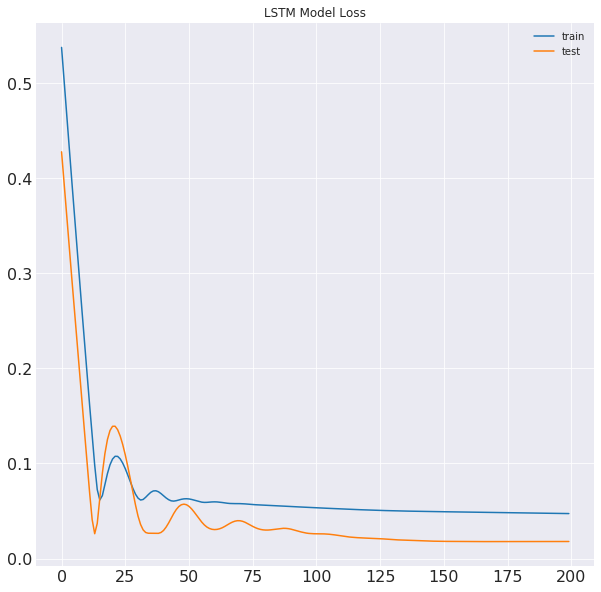

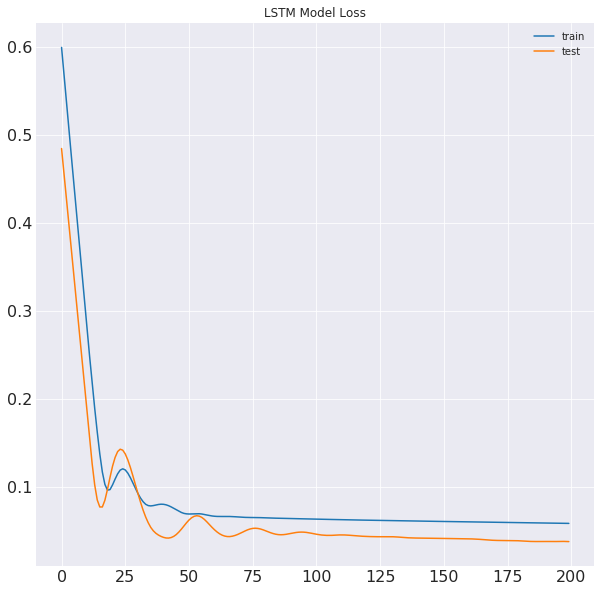

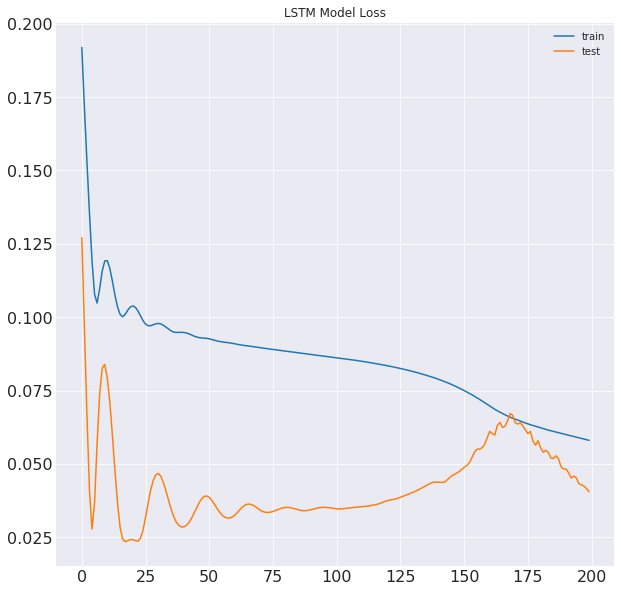

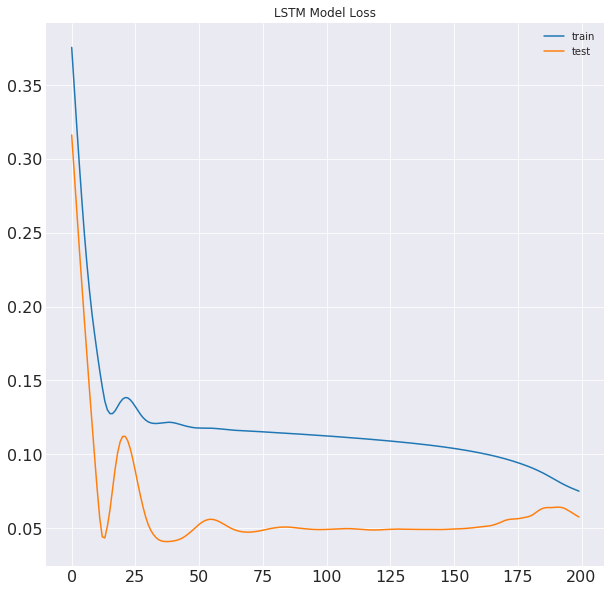

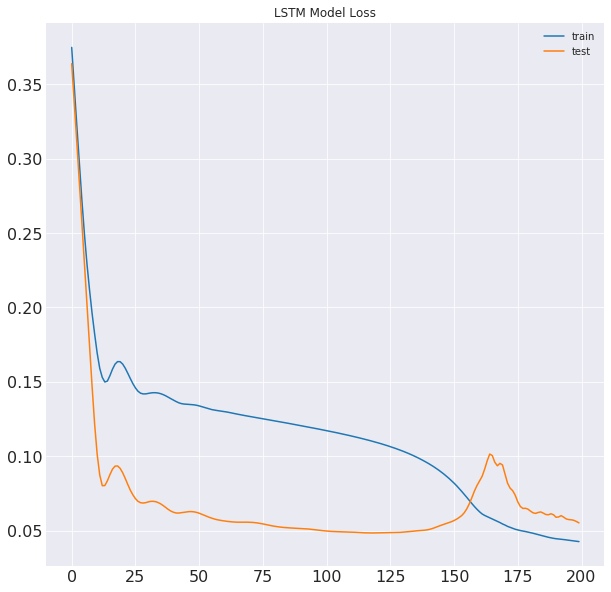

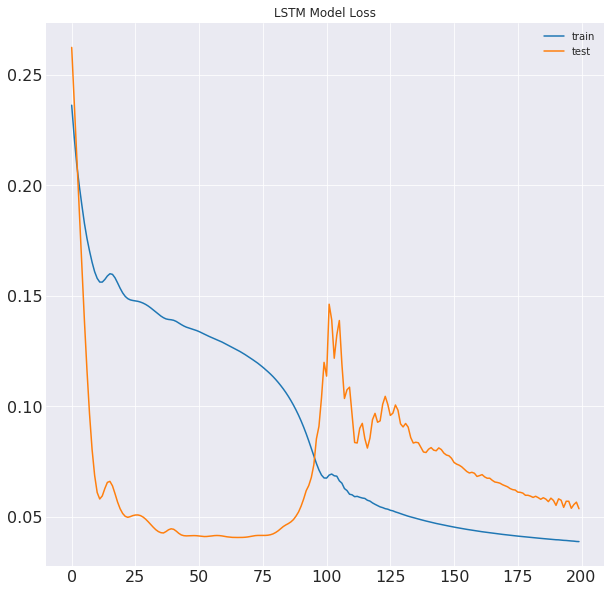

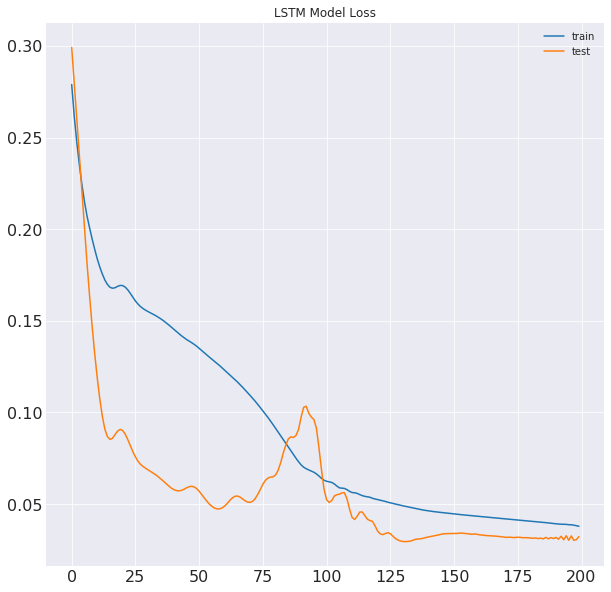

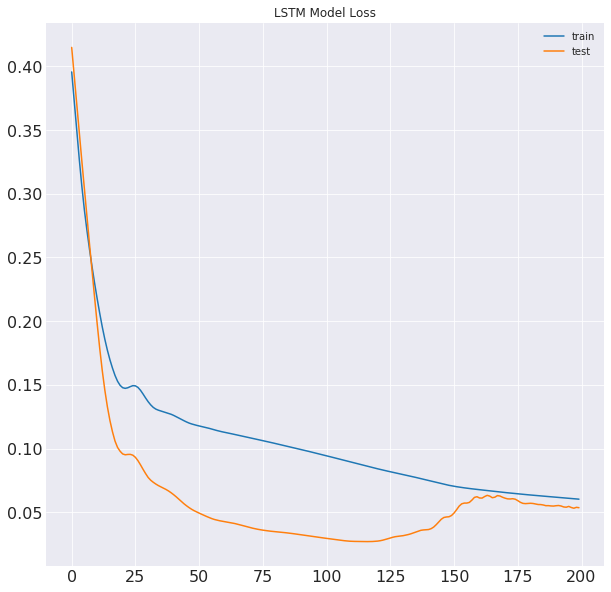

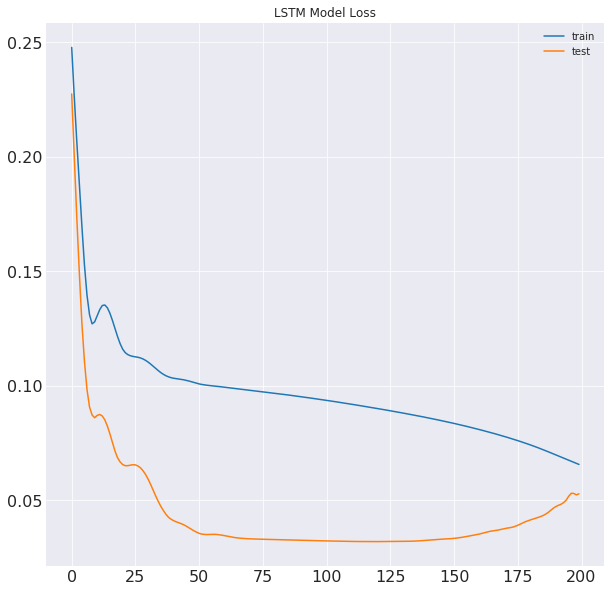

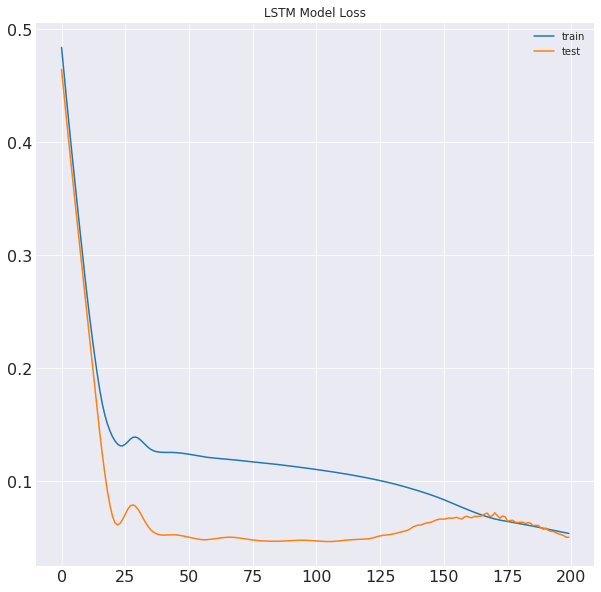

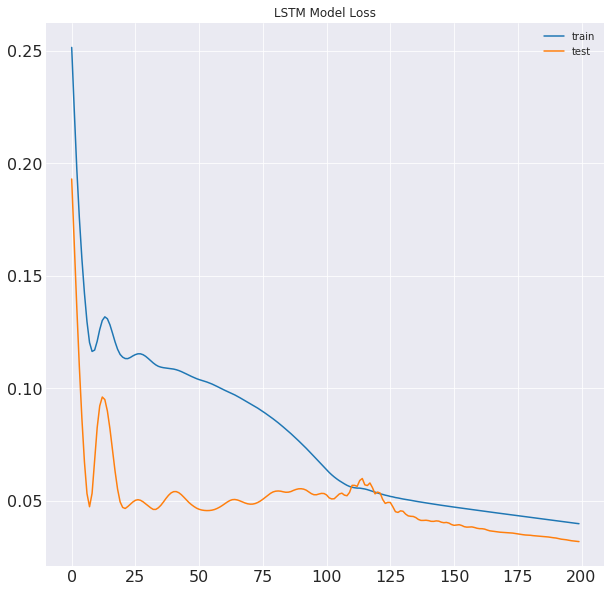

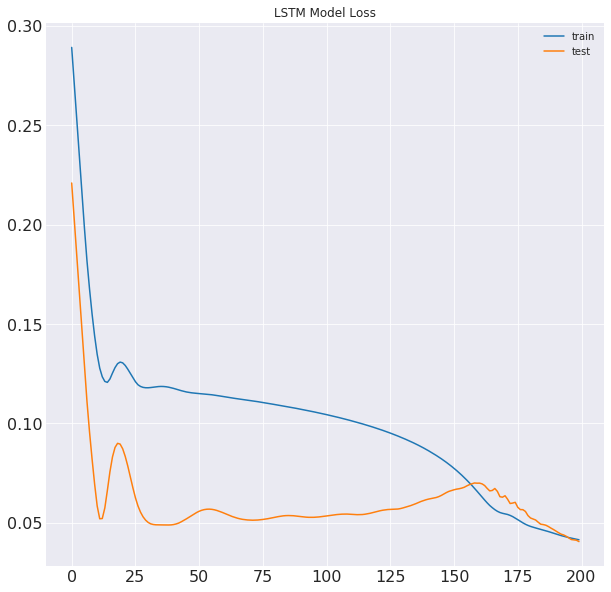

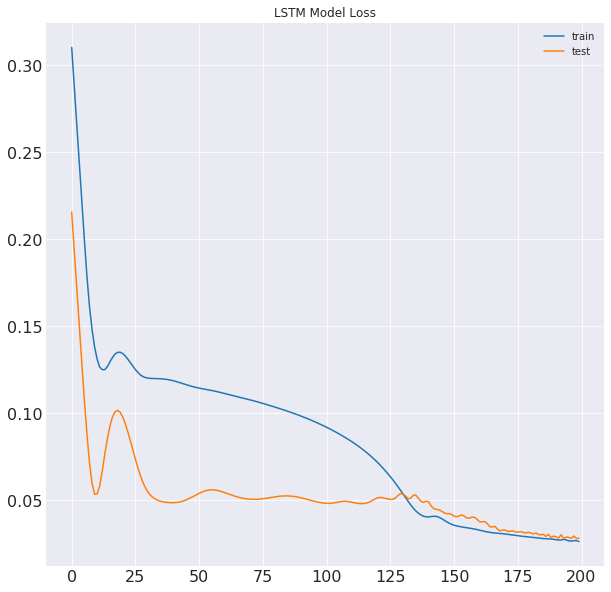

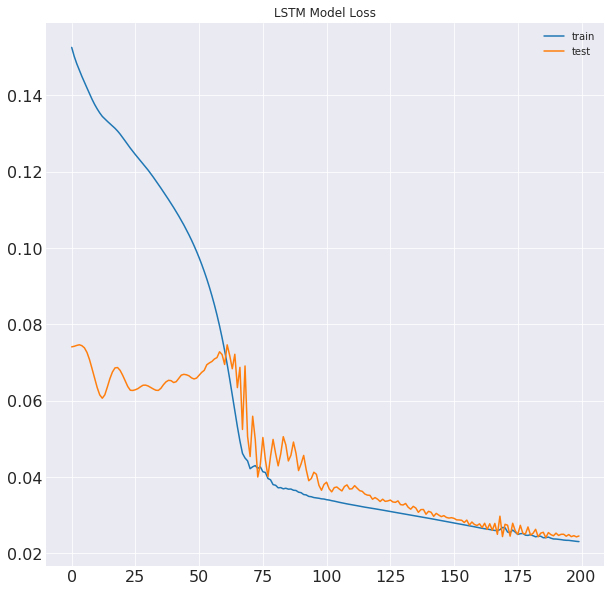

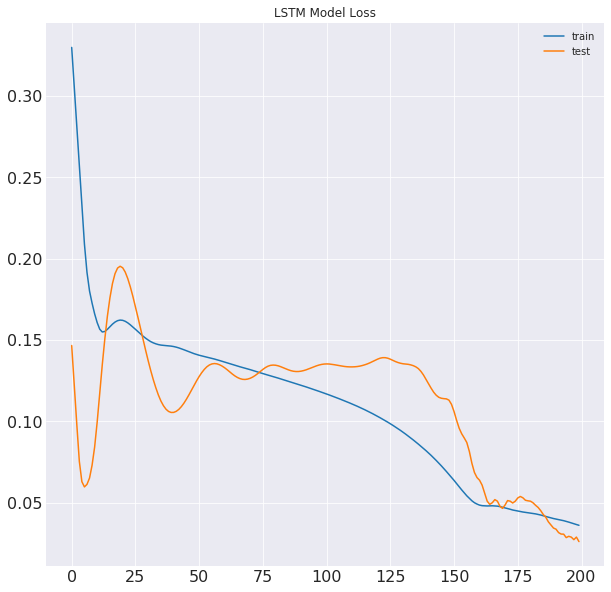

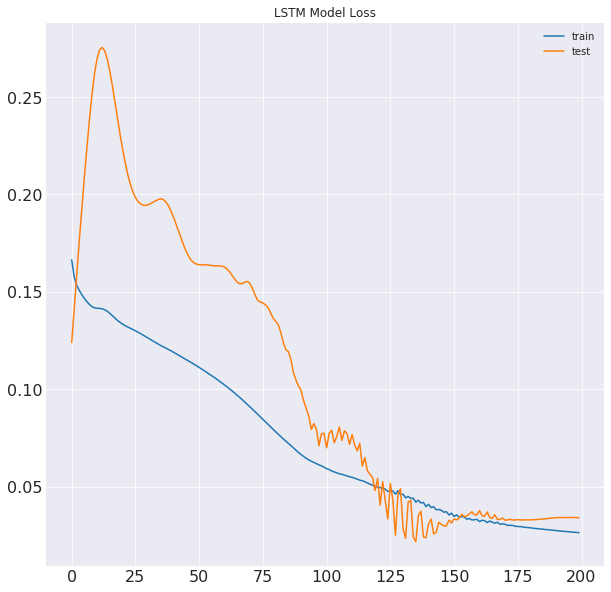

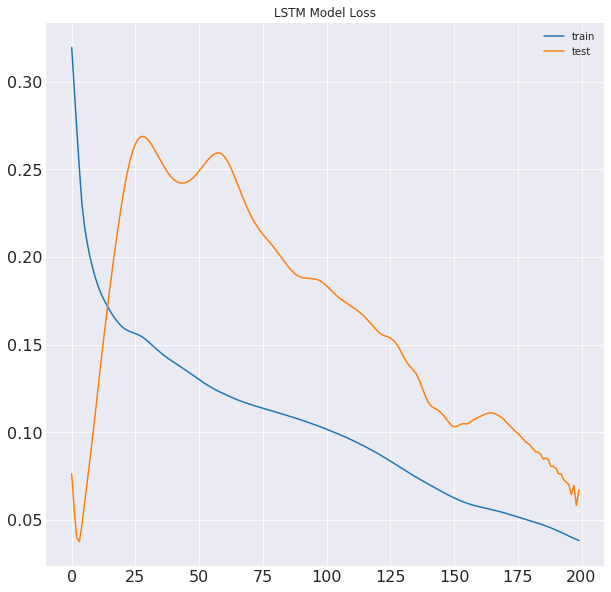

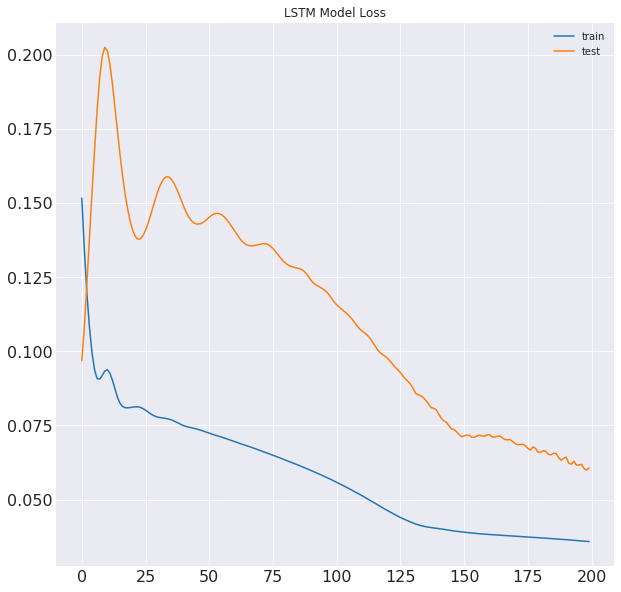

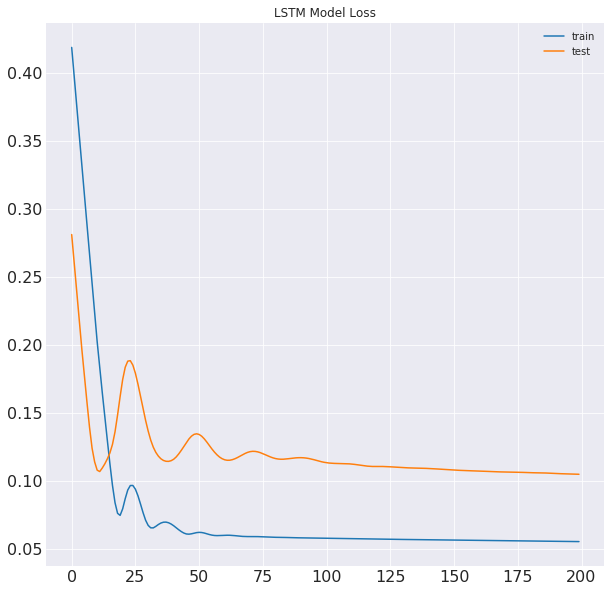

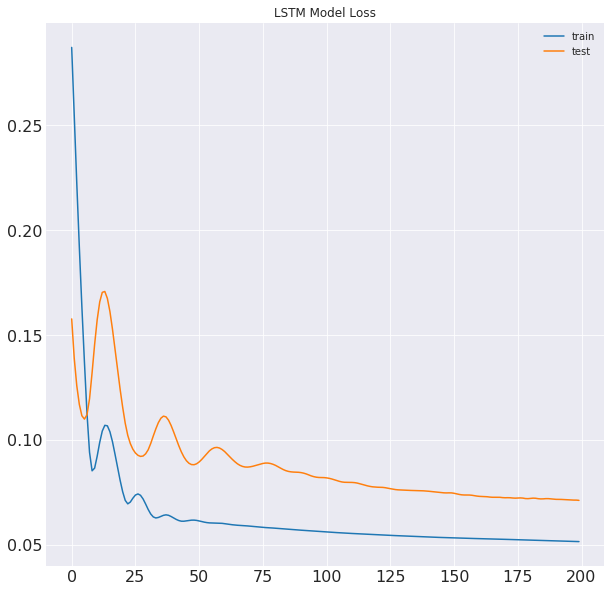

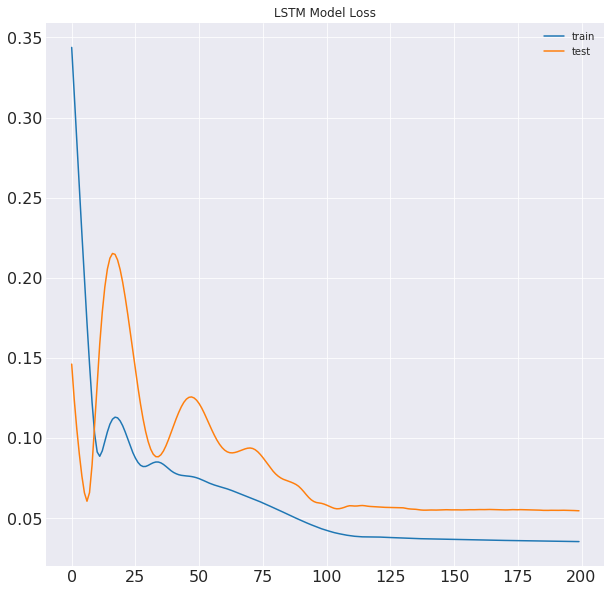

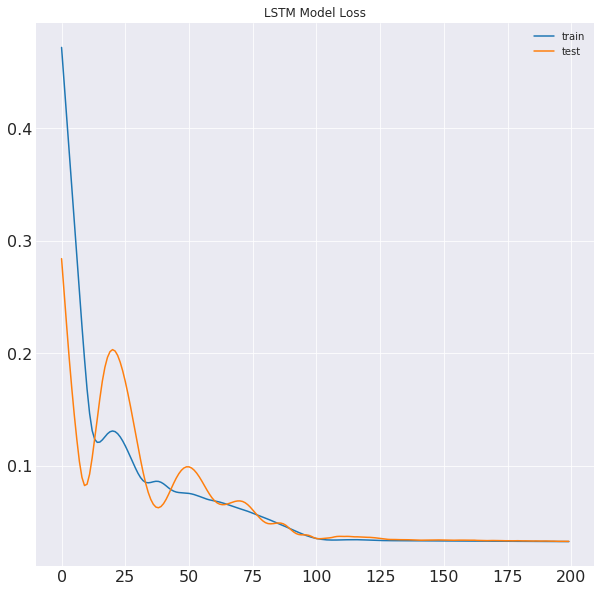

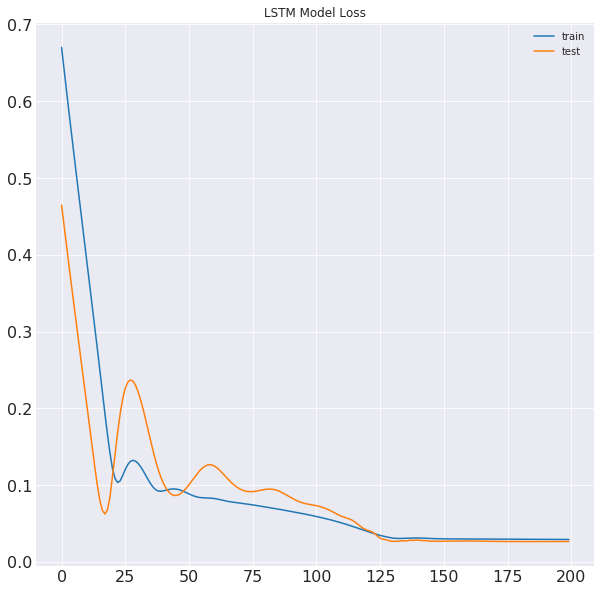

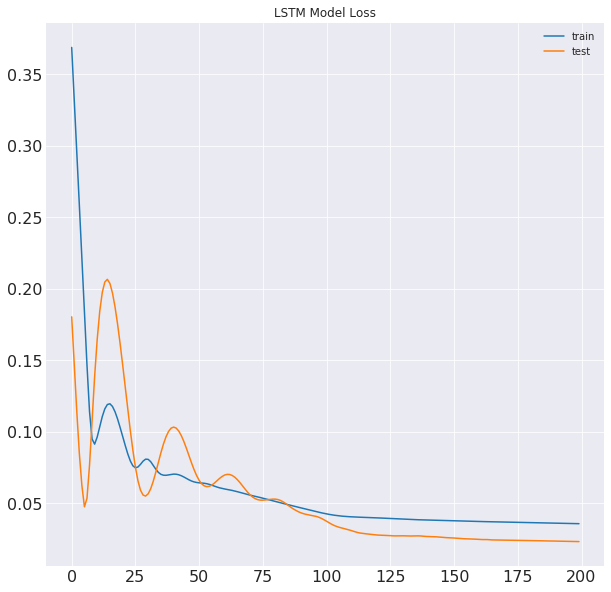

In [7]:
for i in range (24):
    values = total_values[total_values[:, -4] == total_values[i, 1]]
    n_train_hours = 365*3
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    n_obs = n_hours * n_features
    train_X, train_y = train[:, :n_obs], train[:, -1]
    test_X, test_y = test[:, :n_obs], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
    test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

    # design network
    model = Sequential()
    model.add(LSTM(24, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')

    # fit network
    history = model.fit(train_X, train_y, epochs=200, batch_size=train_X.shape[0],
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)
    
    history_loss = pd.DataFrame()
    history_loss['train'] = history.history['loss']
    history_loss['test'] = history.history['val_loss']
    history_loss.plot(figsize=(10,10), fontsize=16,
                title='LSTM Model Loss');
    
    # make a prediction 
    yhat = model.predict(test_X)
    # reshape back to 2d
    test_X = test_X.reshape((test_X.shape[0], -1))

    # invert scaling for forecast# invert 
    inv_yhat = np.concatenate((test[:, 115:119], yhat), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,-1]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test[:, 115:119], test_y), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-1]
    inv_yhat_gte_zero = inv_yhat.copy()
    inv_yhat_gte_zero[inv_yhat_gte_zero < 0] = 0

    # calculate r2
    result[0, i] = r2_score(inv_y, inv_yhat)

    # calculate mean absolute error
    result[1, i] = mean_absolute_error(inv_y, inv_yhat)

    # calculate rmse
    rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
    result[2, i]= rmse

    # calculate mean absolute error percentage
    maep = np.mean(np.abs((inv_y - inv_yhat)/inv_y))*100
    result[3, i] = maep

In [8]:
result[3, :]

array([  6.61704689,  13.72232437,  13.8626352 ,  20.13815343,
        18.06488633,  16.57057106,   9.73836854,  17.11890548,
        17.75422394,  18.64799112,  14.04315531,  25.8674711 ,
        21.85214609,  24.81171489,  45.36946118,  53.40020061,
       120.48784494,  89.47886825, 119.33946609,  64.62555528,
        37.25633323,  18.33637655,  12.46663556,   9.26969424])